# Primera tasca APA 2023: Anàlisi fitxer de so

## Nom i cognoms: Maider Duró i Victòria Blanco

## Representació temporal i freqüencial de senyals d'àudio

In [77]:
import numpy as np # biblioteca funcions matemàtiques
import matplotlib.pyplot as plt # representar graficament so
import soundfile as sf #escriure senyal a fitxer .wav
import sounddevice as sd # accedir a la tarja de so

1. Reprodueix l'exemple fent servir diferents freqüències per la sinusoide. Al menys considera fx= 4kHz, a banda d'una freqüència pròpia en el marge audible. Comenta els resultats.

In [82]:
T= 2.5                               # Durada de T segons
fm=8000                              # Freqüència de mostratge en Hz
fx=4000                               # Freqüència de la sinusoide
A=40                                  # Amplitud de la sinusoide
pi=np.pi                             # Valor del número pi
L = int(fm * T)                      # Nombre de mostres del senyal digital
Tm=1/fm                              # Període de mostratge
t=Tm*np.arange(L)                    # Vector amb els valors de la variable temporal, de 0 a T
x = A * np.cos(2 * pi * fx * t)      # Senyal sinusoidal
sf.write('so_exemple1.wav', x, fm)   # Escriptura del senyal a un fitxer en format wav

In [44]:
import sounddevice as sd      # Importem el mòdul sounddevice per accedir a la tarja de so
sd.play(x, fm)                # Reproducció d'àudio

2. Modifica el programa per considerar com a senyal a analitzar el senyal del fitxer wav que has creat 
(x_r, fm = sf.read('nom_fitxer.wav')).

- Insereix a continuació una gràfica que mostri 5 períodes del senyal i la seva transformada.

- Explica el resultat del apartat anterior.

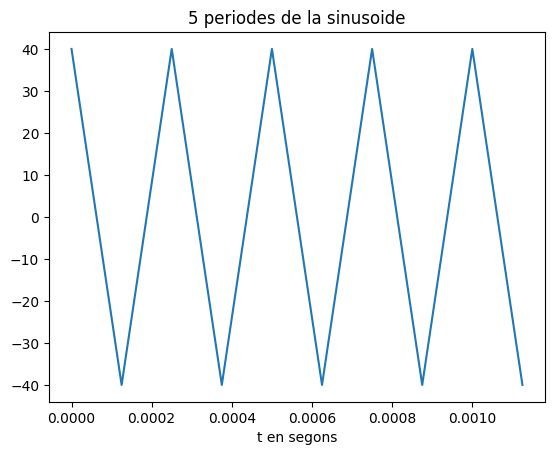

In [84]:
(x_r, fm) = sf.read('so_exemple1.wav')
Tx=1/fx                                   # Període del senyal
Ls=int(fm*5*Tx)                           # Nombre de mostres corresponents a 5 períodes de la sinusoide

plt.figure(0)                             # Nova figura
plt.plot(t[0:Ls], x[0:Ls])                # Representació del senyal en funció del temps
plt.xlabel('t en segons')                 # Etiqueta eix temporal
plt.title('5 periodes de la sinusoide')   # Títol del gràfic
plt.show()                                # Visualització de l'objecte gràfic. 

3. Modifica el programa per representar el mòdul de la Transformada de Fourier en dB i l'eix d'abscisses en el marge de 0 a fm/2 en Hz.
- Comprova que la mesura de freqüència es correspon amb la freqüència de la sinusoide que has fet servir.
- Com pots identificar l'amplitud de la sinusoide a partir de la representació de la transformada? Comprova-ho amb el senyal generat.

In [46]:
from numpy.fft import fft     # Importem la funció fft
N=5000                        # Dimensió de la transformada discreta
X=fft(x[0 : Ls], N)           # Càlcul de la transformada de 5 períodes de la sinusoide

C:\Users\victo\AppData\Local\Temp\ipykernel_10512\312922069.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot((fm/N)*k[:N//2], 20 * np.log10(abs(X)/np.max(abs(X)))[:N//2])    # Representació del mòdul de la transformada en dB


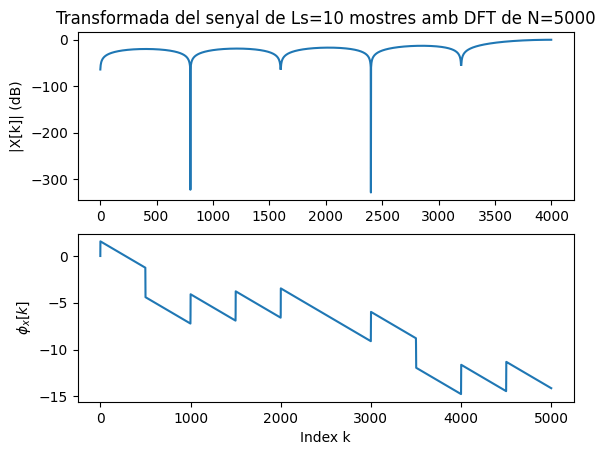

In [49]:
k=np.arange(N)                        # Vector amb els valors 0≤  k<N

plt.figure(1)                         # Nova figura
plt.subplot(211)                      # Espai per representar el mòdul
plt.plot((fm/N)*k[:N//2], 20 * np.log10(abs(X)/np.max(abs(X)))[:N//2])    # Representació del mòdul de la transformada en dB
plt.title(f'Transformada del senyal de Ls={Ls} mostres amb DFT de N={N}')   # Etiqueta del títol
plt.ylabel('|X[k]| (dB)')                  # Etiqueta de mòdul
plt.subplot(212)                      # Espai per representar la fase
plt.plot(k,np.unwrap(np.angle(X)))    # Representació de la fase de la transformad, desenroscada
plt.xlabel('Index k')                 # Etiqueta de l'eix d'abscisses 
plt.ylabel('$\phi_x[k]$')             # Etiqueta de la fase en Latex
plt.show()                            # Per mostrar els grafics

4. Tria un fitxer d'àudio en format wav i mono (el pots aconseguir si en tens amb altres formats amb el programa Audacity).
    Llegeix el fitxer d'àudio i comprova:

    - Freqüència de mostratge.
    - Nombre de mostres de senyal.
    - Tria un segment de senyal de 25ms i insereix una gráfica amb la seva evolució temporal.
    - Representa la seva transformada en dB en funció de la freqüència, en el marge $0\le f\le f_m/2$.
    - Quines son les freqüències més importants del segment triat?

Freqüència mostratge:  44100
Nombre mostres de senyal:  220500


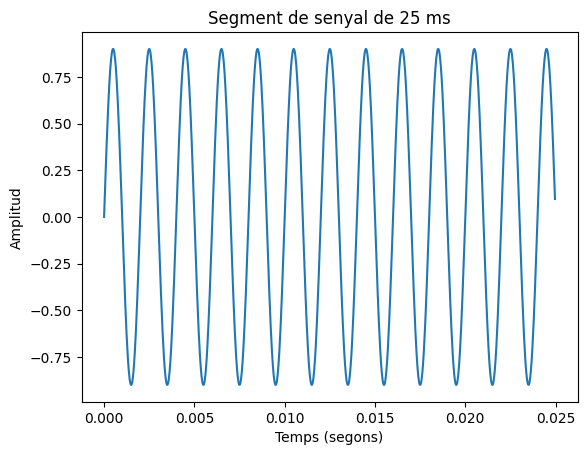

In [55]:
# Lectura ficher audio
x_r2, fm2 = sf.read('fichero_audio_t1.wav')

# Freqüencia mostratge
print("Freqüència mostratge: ", fm2) # mostra la fm

#Nombre de mostres de senyal
L2 = len(x_r2)
print("Nombre mostres de senyal: ", L2) # mostra el numero total de mostres

#Segment de 25ms amb la seva gràfica d'evolució temporal
L_25 = int(fm2*0.025) #numero mostres segment de 25 ms
x_25 = x_r2[:L_25] #seleccionar segment de la senyal de 25 ms
Tm2 = 1/fm2
t_25 = np.linspace(0, L_25 / fm2, L_25)
t_25 = Tm2*np.arange(L_25) #vector de temps per 25 ms de senyal

plt.figure(2)
plt.plot(t_25, x_25)
plt.xlabel('Temps (segons)')
plt.ylabel('Amplitud')
plt.title('Segment de senyal de 25 ms')
plt.show()


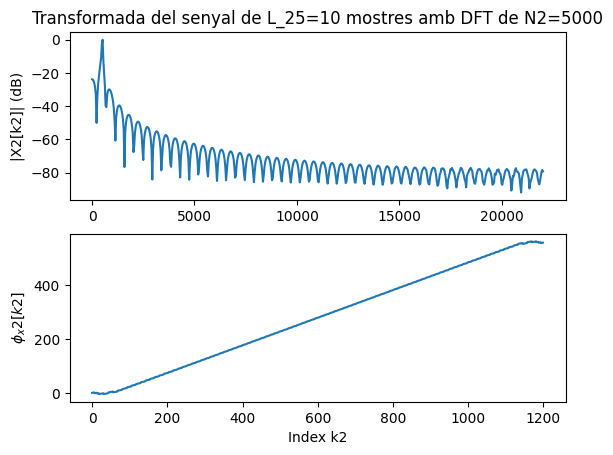

In [69]:
# Representació de la Transformada de Fourier del senyal
N2=1200                      # Dimensió de la transformada discreta
X2=fft(x_25[0 : L_25], N2) 
k2=np.arange(N2)                        # Vector amb els valors 0≤  k2<N2

plt.figure(3)                         # Nova figura
plt.subplot(211)                      # Espai per representar el mòdul
plt.plot((fm2/N2)*k2[:N2//2], 20 * np.log10(abs(X2)/np.max(abs(X2)))[:N2//2])    # Representació del mòdul de la transformada en dB
plt.title(f'Transformada del senyal de L_25={Ls} mostres amb DFT de N2={N}')   # Etiqueta del títol
plt.ylabel('|X2[k2]| (dB)')                  # Etiqueta de mòdul
plt.subplot(212)                      # Espai per representar la fase
plt.plot(k2,np.unwrap(np.angle(X2)))    # Representació de la fase de la transformad, desenroscada
plt.xlabel('Index k2')                 # Etiqueta de l'eix d'abscisses 
plt.ylabel('$\phi_x2[k2]$')             # Etiqueta de la fase en Latex
plt.show()                            # Per mostrar els grafics    